Hello Spencer!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

loading dataframe as taxi

In [2]:
taxi = pd.read_csv('/datasets/taxi.csv')

checking dataframe

In [3]:
taxi.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


setting taxi to datetime data type

In [5]:
taxi['datetime'] = pd.to_datetime(taxi['datetime'])

checking for duplicates

In [6]:
taxi.duplicated().sum()

0

checking basic statistics about the data

In [7]:
taxi.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


checking for missing values

In [8]:
missing_values = taxi.isnull().sum()
missing_values_percentage = (missing_values / len(taxi)) * 100

missing_values_summary = pd.DataFrame({
    'missing_values': missing_values,
    'percentage': missing_values_percentage
})


missing_values_summary

,missing_values,percentage
datetime,0,0.0
num_orders,0,0.0


data has been prepared for analysis. there were no missing values, no duplicates, datetime column has been changed to a datetime data type

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice initial review!
</div>

## Analysis

setting index to datetime

In [9]:
taxi.set_index('datetime', inplace=True)

resampling the data by hour

In [10]:
taxi_h = taxi.resample('1H').sum()

taxi_h.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [11]:
taxi_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


plotting the new taxi hourly dataframe

<AxesSubplot:xlabel='datetime'>

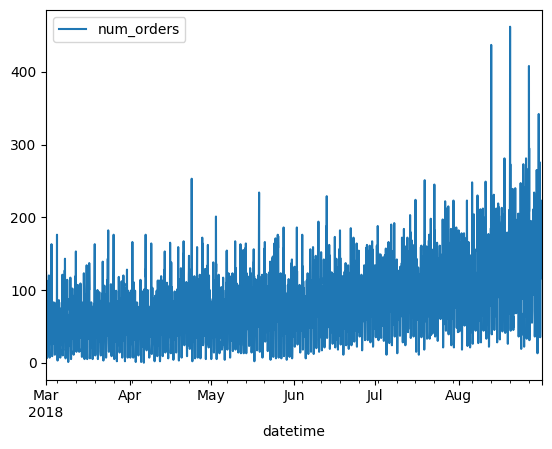

In [12]:
taxi_h.plot()

checking basic statistics of dataframe

In [13]:
taxi_h.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


creating a rolling 24 hour mean of dataframe

In [14]:
taxi_h['rolling_24h'] = taxi_h['num_orders'].rolling(window=24).mean()

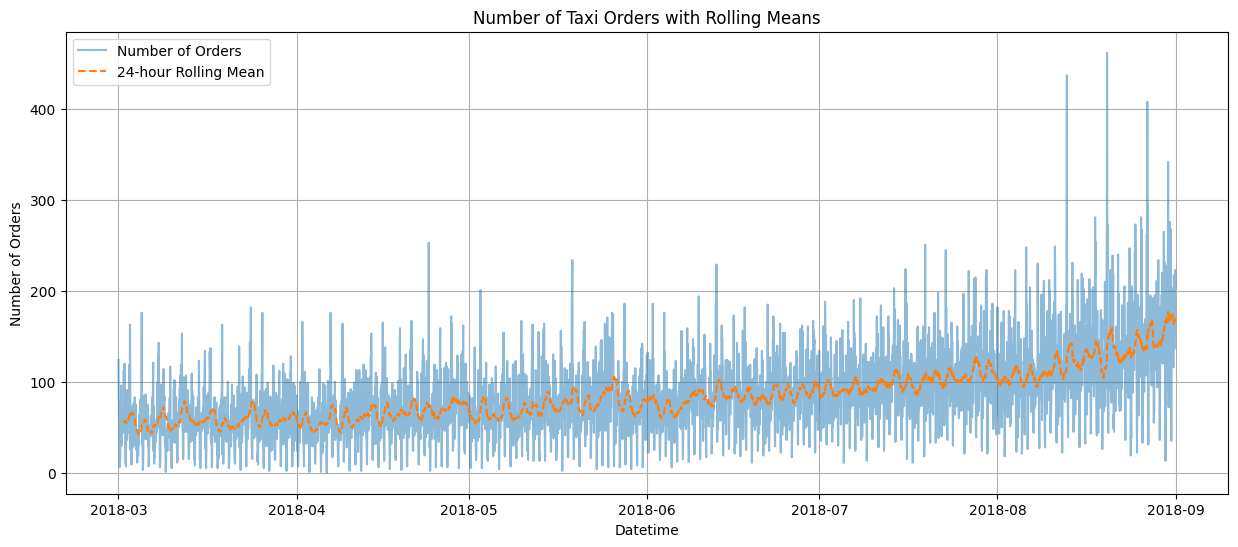

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(taxi_h.index, taxi_h['num_orders'], label='Number of Orders', alpha=0.5)
plt.plot(taxi_h.index, taxi_h['rolling_24h'], label='24-hour Rolling Mean', linestyle='--')
plt.title('Number of Taxi Orders with Rolling Means')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

checking for any missing values

In [16]:
missing_values = taxi_h.isnull().sum()
missing_values_percentage = (missing_values / len(taxi_h)) * 100

missing_values_summary = pd.DataFrame({
    'missing_values': missing_values,
    'percentage': missing_values_percentage
})


missing_values_summary

,missing_values,percentage
num_orders,0,0.000000
rolling_24h,23,0.520833


removing missing values

In [17]:
taxi_h_clean = taxi_h.dropna()

sorting the index 

In [18]:
taxi_h_clean.sort_index(inplace=True)

In [19]:
taxi_h_clean.head()

,num_orders,rolling_24h
datetime,,
2018-03-01 23:00:00,58,56.833333
2018-03-02 00:00:00,90,55.416667
2018-03-02 01:00:00,120,56.875000
2018-03-02 02:00:00,75,57.041667
2018-03-02 03:00:00,64,56.958333


plotting the new dataframe with the rolling 24hour mean

<Figure size 1000x600 with 0 Axes>

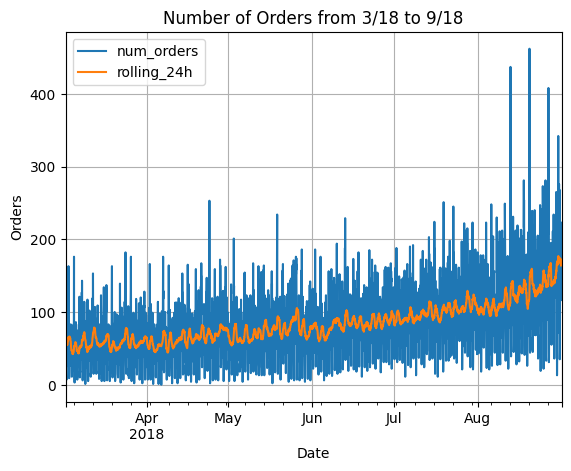

In [20]:
plt.figure(figsize=(10, 6))
taxi_h_clean.plot()
plt.title('Number of Orders from 3/18 to 9/18')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.grid(True)
plt.show()

checking seasonals based on a weekly time chart

In [21]:
num_orders_series = taxi_h_clean['num_orders']

decomposition = seasonal_decompose(num_orders_series, model='additive', period=24*7)

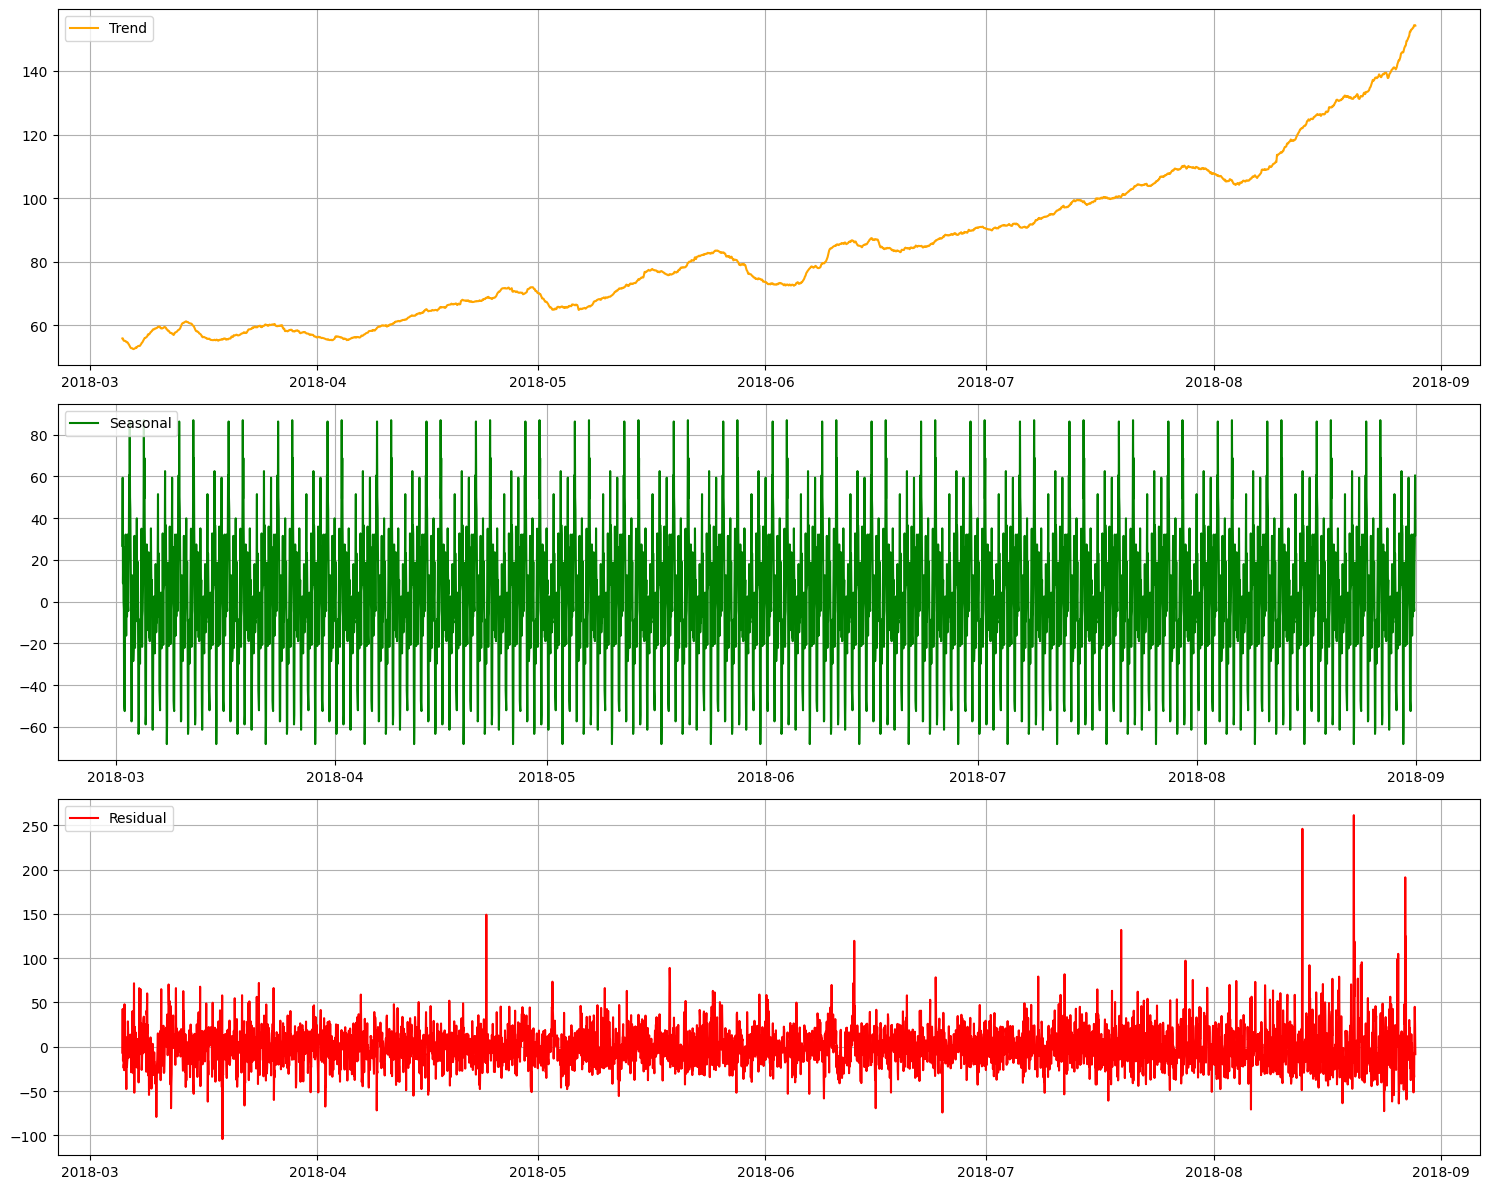

In [22]:
plt.figure(figsize=(15, 12))

plt.subplot(311)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(313)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

there is a clear upward trend in the number of orders and seasonal looks evenly distributed. the residual is random

checking to see if it is a stationary time series

/tmp/ipykernel_217/3838107177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_h_clean['mean'] = taxi_h_clean['num_orders'].rolling(24).mean()
/tmp/ipykernel_217/3838107177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_h_clean['std'] = taxi_h_clean['num_orders'].rolling(24).std()


<AxesSubplot:xlabel='datetime'>

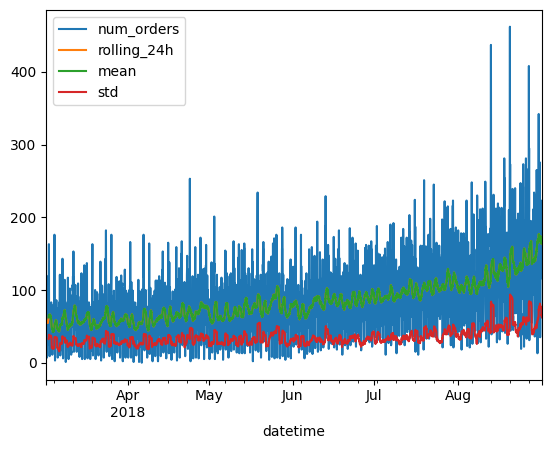

In [23]:
taxi_h_clean['mean'] = taxi_h_clean['num_orders'].rolling(24).mean()
taxi_h_clean['std'] = taxi_h_clean['num_orders'].rolling(24).std()
taxi_h_clean.plot()

the mean and std change over time making it a nonstationary time series

In [24]:
taxi_h_clean.head()

,num_orders,rolling_24h,mean,std
datetime,,,,
2018-03-01 23:00:00,58,56.833333,NaN,NaN
2018-03-02 00:00:00,90,55.416667,NaN,NaN
2018-03-02 01:00:00,120,56.875000,NaN,NaN
2018-03-02 02:00:00,75,57.041667,NaN,NaN
2018-03-02 03:00:00,64,56.958333,NaN,NaN


In [25]:
columns_to_drop = ['mean', 'std', 'rolling_24h']
taxi_h_clean.drop(columns=columns_to_drop, inplace=True)

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
taxi_h_clean.head()

,num_orders
datetime,
2018-03-01 23:00:00,58
2018-03-02 00:00:00,90
2018-03-02 01:00:00,120
2018-03-02 02:00:00,75
2018-03-02 03:00:00,64


<AxesSubplot:xlabel='datetime'>

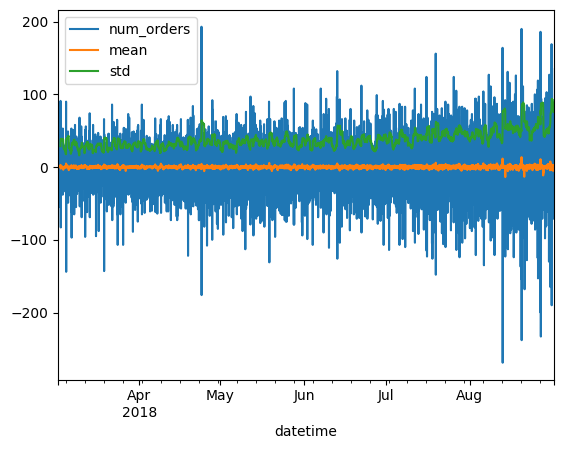

In [27]:
taxi_h_clean_diff = taxi_h_clean-taxi_h_clean.shift()

taxi_h_clean_diff['mean'] = taxi_h_clean_diff['num_orders'].rolling(24).mean()
taxi_h_clean_diff['std'] = taxi_h_clean_diff['num_orders'].rolling(24).std()
taxi_h_clean_diff.plot()

after checking all the preliminaries, I am ready to train the models

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good analysis!
</div>

## Training

In [28]:
def make_features(taxi_h_clean, max_lag, rolling_mean_size):
    taxi_h_clean['year'] = taxi_h_clean.index.year
    taxi_h_clean['month'] = taxi_h_clean.index.month
    taxi_h_clean['day'] = taxi_h_clean.index.day
    taxi_h_clean['dayofweek'] = taxi_h_clean.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        taxi_h_clean['lag_{}'.format(lag)] = taxi_h_clean['num_orders'].shift(lag)

    taxi_h_clean['rolling_mean'] = taxi_h_clean['num_orders'].shift().rolling(window=rolling_mean_size).mean()

make_features(taxi_h_clean, 25, 24)
taxi_h_clean.head()

/tmp/ipykernel_217/3578641091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_h_clean['year'] = taxi_h_clean.index.year
/tmp/ipykernel_217/3578641091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_h_clean['month'] = taxi_h_clean.index.month
/tmp/ipykernel_217/3578641091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 23:00:00,58,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-02 00:00:00,90,2018,3,2,4,58.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-02 01:00:00,120,2018,3,2,4,90.0,58.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-02 02:00:00,75,2018,3,2,4,120.0,90.0,58.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-02 03:00:00,64,2018,3,2,4,75.0,120.0,90.0,58.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
taxi_h_clean = taxi_h_clean.dropna()

In [30]:
taxi_h_clean.head()

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-03 00:00:00,163,2018,3,3,5,72.0,119.0,101.0,93.0,49.0,...,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.0,62.750000
2018-03-03 01:00:00,108,2018,3,3,5,163.0,72.0,119.0,101.0,93.0,...,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,65.791667
2018-03-03 02:00:00,25,2018,3,3,5,108.0,163.0,72.0,119.0,101.0,...,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,65.291667
2018-03-03 03:00:00,64,2018,3,3,5,25.0,108.0,163.0,72.0,119.0,...,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,63.208333
2018-03-03 04:00:00,44,2018,3,3,5,64.0,25.0,108.0,163.0,72.0,...,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,63.208333


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

splitting the data

In [31]:
train, test = train_test_split(taxi_h_clean, shuffle=False, test_size=0.1)
train = train.dropna()

X_train = train.drop(columns=['num_orders'])
y_train = train['num_orders']
X_test = test.drop(columns=['num_orders'])
y_test = test['num_orders']

scaling the data

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

defining a funtion to help build models

In [33]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse, y_pred

random forest model

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=12345)
rmse_rf, y_pred_rf = train_and_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)


rmse_rf

44.43706121966007

gradient boosting model

In [35]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=12345)
rmse_gb, y_pred_gb = train_and_evaluate_model(gb_model, X_train_scaled, y_train, X_test_scaled, y_test)

rmse_gb


43.582974540548285

linear regression model

In [36]:
lr_model = LinearRegression()
rmse_lr_s, y_pred_lr = train_and_evaluate_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)

rmse_lr_s

45.687228742386864

out of the three models, with the lags set at 25 and the rolling mean set at 24 hours, the gradient boosting model scored the best with 43.3. this meets the companies threshold. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Something needs to be changed, but don't worry, you've got this.
    
We need to get RMSE < 48. Our recommendation is to try different models with different hyperparameters (random forest, gradient boosting).
                         
                         
Also, it's a good practice to plot predictions and true values.
</div>

gradient boosting model predicted and true values

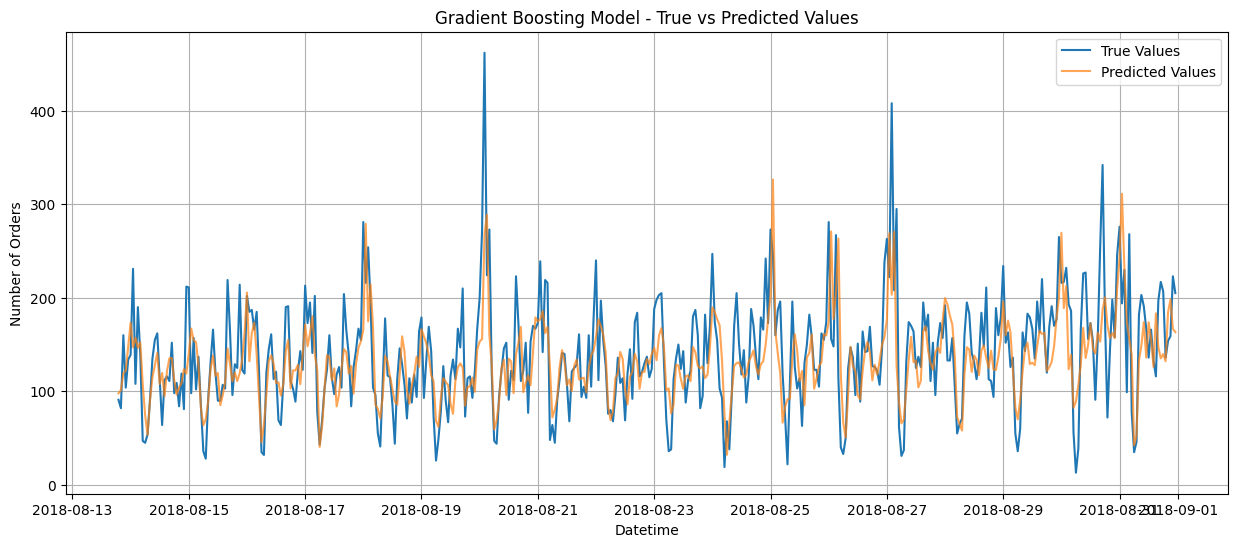

In [37]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='True Values')
plt.plot(y_test.index, y_pred_gb, label='Predicted Values', alpha=0.7)
plt.title('Gradient Boosting Model - True vs Predicted Values')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

the true and predicted values match up and hold similar patterns

in conclusion: in this project I have taken the data, cleaned it up, split it into training and test sets, scaled the data, added 25 lags with a rolling mean of 24 hours. I trained several models, the gradient boosting model scored the highest with 43.3 which is better than what the company was asking for (48)

## Testing

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please add final conclusion.
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for sending your project. You've done a really good job on it!

<span class="text-danger"> However, part with training model still needs a bit of work. Please check my comments.</span>
    
I believe you can easily fix it!   
</div>

# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48